Write out to a vtp file

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import numpy as np 
import pyvista as pv 
from vtk_smoldyn.generate_data import generate_molecule_coordinates, generate_molecules, get_axis
from vtk_smoldyn.filepaths import minE_fp

In [3]:
molecules = generate_molecules(minE_fp, 2)
molecule_coords = generate_molecule_coordinates(minE_fp, 2)

Libsmoldyn notification from smolRunSim: Simulation complete


--------------------------------------------------------------
Running Smoldyn 2.72

CONFIGURATION FILE
 Path: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/'
 Name: 'model.txt'
 Reading file: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt'
 Loaded file successfully
 setting up molecules
 setting up virtual boxes
 setting up compartments
 setting up reactions
 setting up surfaces
 setting up graphics

SIMULATION PARAMETERS
 file: /Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt
 starting clock time: Tue Dec 19 14:51:18 2023
 3 dimensions
 Accuracy level: 5
 Random number seed: 1
 Time from 0 to 500 step 0.002

GRAPHICS PARAMETERS
 No graphical output

WALL PARAMETERS
 wall 0: dimension x, at -2
 wall 1: dimension x, at 2
 wall 2: dimension y, at -0.5
 wall 3: dimension y, at 0.5
 wall 4: dimension z, at -0.5
 wall 5: dimension

Libsmoldyn notification from smolRunSim: Simulation complete


In [4]:
from tempfile import NamedTemporaryFile as NTF

In [5]:
temp = NTF('w', suffix=".vtp")
temp.name

'/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmpmwgk9fd7.vtp'

In [6]:
mesh = pv.PolyData(molecule_coords)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


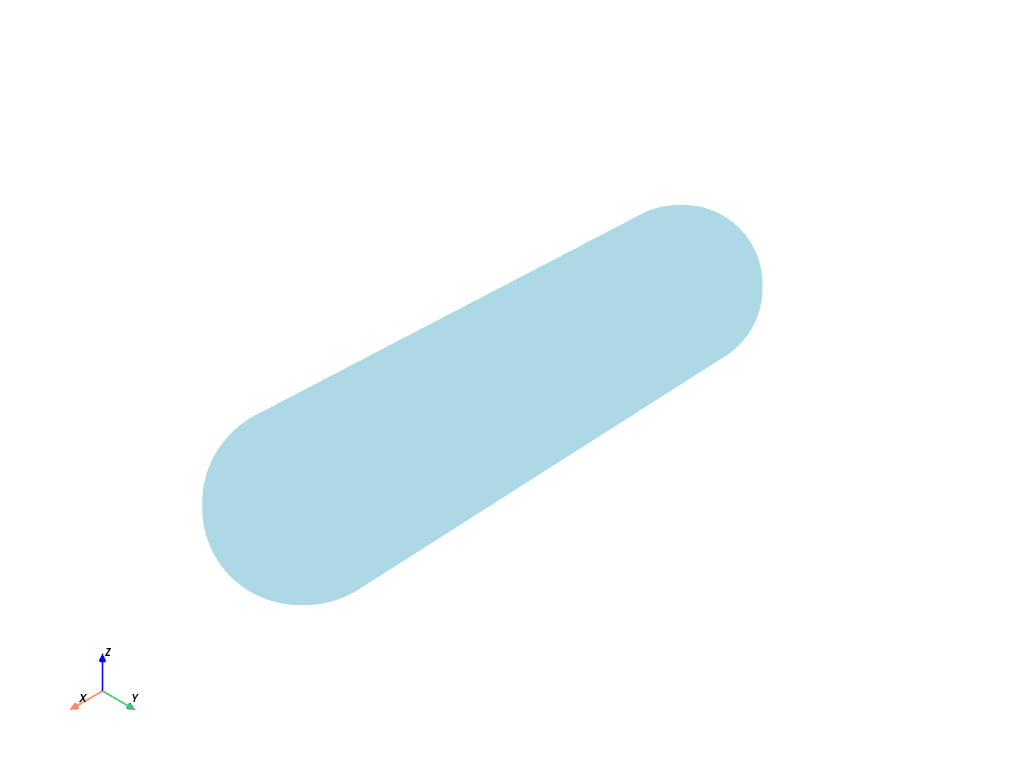

In [7]:
mesh.plot()

In [8]:
y = get_axis(molecule_coords, axis=1)
z = get_axis(molecule_coords, axis=2)

In [12]:
mesh_grid = pv.StructuredGrid(
    np.array(molecule_coords), 
)

In [13]:
mesh['height'] = mesh.points[:, 1]
mesh['id'] = np.arange(mesh.n_cells)
mesh.save(temp.name)

In [14]:
new_mesh = pv.read(temp.name)
print(f"All arrays: {mesh.array_names}")

All arrays: ['height', 'id']


In [15]:
reader = pv.get_reader(temp.name)
reader

XMLPolyDataReader('/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmpmwgk9fd7.vtp')

In [16]:
print(f"Number of point arrays: {reader.number_point_arrays}")
print(f"Available point data:   {reader.point_array_names}")
print(f"Number of cell arrays:  {reader.number_cell_arrays}")
print(f"Available cell data:    {reader.cell_array_names}")

Number of point arrays: 2
Available point data:   ['height', 'id']
Number of cell arrays:  0
Available cell data:    []


In [17]:
print(f"Point array status: {reader.all_point_arrays_status}")
print(f"Cell array status:  {reader.all_cell_arrays_status}")
reader_mesh = reader.read()
print(f"Read arrays:        {reader_mesh.array_names}")

Point array status: {'height': True, 'id': True}
Cell array status:  {}
Read arrays:        ['height', 'id']


In [18]:
reader.enable_all_cell_arrays()
reader_mesh_2 = reader.read()
print(f"New read arrays: {reader_mesh_2.array_names}")

New read arrays: ['height', 'id']


In [19]:
reader_mesh_2.points

pyvista_ndarray([[ 1.25018248,  0.09340846, -0.49119737],
                 [ 1.65876787, -0.01451408,  0.47390094],
                 [-1.32922979, -0.18900231, -0.46290186],
                 ...,
                 [ 0.14728672, -0.30509238,  0.39612958],
                 [ 0.51261817, -0.36674853, -0.33984631],
                 [ 0.1381137 ,  0.20106383, -0.45779181]])

In [20]:
dir(reader_mesh_2.points)

['Association',
 'DataSet',
 'T',
 'VTKObject',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__'